# Lab 12 Analysis

The objective of this section was to verify Faraday's law. The IOLab took many more measurements than required, so we'll only be using some of it.

In [121]:
import numpy as np
import scipy as sci
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.interpolate import interp1d

time, mag, highGain = np.loadtxt('data.csv', delimiter = ',', skiprows = 1, usecols = (0, 1, 2), unpack = True)

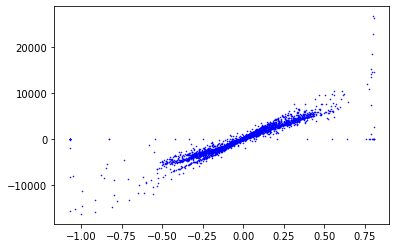

In [122]:
# This is the code provided to us in the lab manual (numerical derivatives)
dbdt = [(mag[i+1]-mag[i-1])/(time[i+1]-time[i-1]) for i in range(1,len(mag)-1)]

#for some reason np.insert did not really work, so instead I added the end points manually using list comprehension.
dbdt = [(mag[1]-mag[0])/(time[1]-time[0])] + dbdt
dbdt += [(mag[-1] - mag[-2])/(time[-1] - time[-2])]

plt.scatter(highGain, dbdt, c = 'blue', s = 0.3)
plt.show()

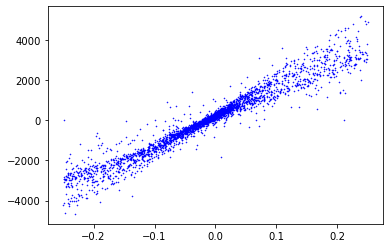

In [123]:
hg_slice = []
dbdt_slice = []

#Array sliing was not behaving 
for i in range(len(highGain)):
    if (highGain[i] > -0.25 and highGain[i] < 0.25):
        hg_slice.append(highGain[i])
        dbdt_slice.append(dbdt[i])

plt.scatter(hg_slice, dbdt_slice, s = 0.3, c = 'blue')
plt.show()

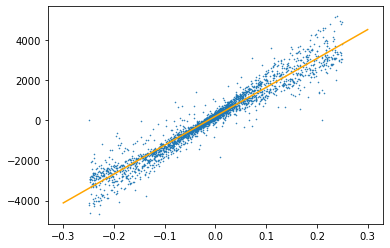

slope: 14397.93523651977
y-intercept: 203.87510399795417


In [124]:
def linear (x, m, b):
    return m*x + b

opt, cov = opt.curve_fit(linear, hg_slice, dbdt_slice)
slope, yint = opt
dslope, dyint = np.sqrt(np.diag(cov))

x_values = np.linspace(-0.3, 0.3, 100)
y_values = linear(x_values, slope, yint)

plt.scatter(hg_slice, dbdt_slice, s = 0.3)
plt.plot(x_values, y_values, c = 'orange')

plt.show()

print(f"slope: {slope}")
print(f"y-intercept: {yint}")